<a href="https://colab.research.google.com/github/TEJRAJ009/Frozen_Lake_Gym/blob/main/Reinforcement_with_OpenAI_Gym.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To fully install OpenAI Gym and be able to use it on a notebook environment like [Google Colaboratory](https://colab.research.google.com/) we need to install a set of dependencies:

- [xvfb](https://en.wikipedia.org/wiki/Xvfb) an X11 display server that will let us render Gym environemnts on Notebook
- [gym (atari)](https://github.com/openai/gym) the Gym environment for Arcade games
- [atari-py](https://github.com/openai/atari-py) is an interface for Arcade Environment. We will use it to load Atari games' Roms into Gym
- [gym-notebook-wrapper](https://github.com/ymd-h/gym-notebook-wrapper) A rendering helper that we will use to display OpenAI Gym games a Notebook

> Note: atari-py was depreacated and is replaced with [ale-py](https://github.com/mgbellemare/Arcade-Learning-Environment). However we can still use it.

In [ ]:
%%capture
%%bash

apt install xvfb
pip install gym[atari]
pip install gym-notebook-wrapper
pip install atari-py

After installation we can check if Gym was installed properly and list names of all available environments sorted alphabetically:

In [ ]:
from gym import envs
env_names = [spec.id for spec in envs.registry.all()]
for name in sorted(env_names):
    print(name)

Next, we need to install Atari Arcade ROMs so that we could load those games into Gym.
1. We need to download the [Roms.rar](http://www.atarimania.com/roms/Roms.rar) file that contains the games
2. We load the Roms to make them accessible to Gym

In [ ]:
%%capture
%%bash

curl -O http://www.atarimania.com/roms/Roms.rar
mkdir roms
yes | unrar e Roms.rar roms/
python -m atari_py.import_roms roms/

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Now, we are ready to play with Gym using one of the available games (e.g. Alien-v4). We will start the display server, then for multiple times we execute a sampled actions for our agent and check the result. If the agent dies we start a new episode.

In [ ]:
%%bash

rm -rf game/*
mkdir -p game

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


sample woking code to do random action

In [ ]:
import gnwrapper
import gym

# Start the display server
env = gnwrapper.Monitor(gym.make('FrozenLake-v1', is_slippery=True), directory="./game")

o = env.reset()

# Take 1000 actions by randomly sampling from the action space
for _ in range(1):
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        env.reset()

# display saved display images as movies
env.display()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym

'rl-video-episode-0.mp4'

**START**

In [ ]:
!pip install numpy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import gnwrapper
import gym
import numpy as np

In [ ]:
# Start the display server
env = gnwrapper.Monitor(gym.make('FrozenLake-v1', is_slippery=True), directory="./game")

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/record_video.py:78: UserWarning: WARN: Overwriting existing videos at /content/game folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


In [ ]:
action_space_size = env.action_space.n
print("Action space size: {}".format(action_space_size))# for this perticyular env [UP,DOWN<LEFFT,RIGHT]

Action space size: 4


In [ ]:
state_space_size = env.observation_space.n
print("observation space size: {}".format(state_space_size)) #it is 16 because the only 16 posible places the agent can be on including

observation space size: 16


In [ ]:
qtable= np.zeros((state_space_size,action_space_size))#rows the the posible state and
qtable

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
#hyper Parameter
total_episodes = 10000
learning_rate = 0.2 #this can be in an range of 0-1 | the lower the more accurate it will be
max_steps = 100
gamma = 0.99  #A value close to 0 makes the agent short-sighted by only considering immediate rewards.
              # A value close to 1 makes it far-sighted by considering future rewards more heavily.
              # It helps balance the trade-off between immediate and delayed rewards.'''

epsilon = 1 #Controls the balance between exploration and exploitation.
max_epsilon = 1
min_epilon = 0.01 #The lower bound for ϵ to ensure the agent always has a small chance to explore, preventing it from getting stuck in local optima.
decay_rate = 0.001 #Decay rate is a factor that reduces the exploration rate ϵ after each episode or step in training.


In [ ]:
import random
#Formula to updateing Q-Table

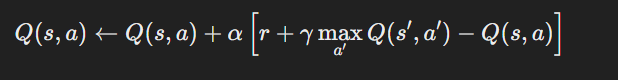

In [ ]:
rewards = []
for episode in range(total_episodes):
  state = env.reset()
  step = 0
  done = False
  total_rewards = 0

  for step in range(max_steps):
    if random.uniform(0,1)> epsilon:
      action = np.argmax(qtable[state,:])#Exploit
    else:
      action = env.action_space.sample()#Explore

    new_state , reward , done , info = env.step(action)
    max_new_state = np.max(qtable[new_state,:])
    qtable[state,action] = qtable[state,action]+learning_rate*(reward+gamma*max_new_state-qtable[state,action])
    total_rewards += reward
    state = new_state
    if done == True:
      break

  epsilon = min_epilon + (max_epsilon - min_epilon)*np.exp(-decay_rate*episode)
  rewards.append(total_rewards)
  print(f"Average reward over 1000 episodes: {total_rewards / 1000}")
env.display()

/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment FrozenLake-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment FrozenLake-v1 initialized

'rl-video-episode-0.mp4'

'rl-video-episode-1.mp4'

'rl-video-episode-8.mp4'

'rl-video-episode-8.mp4'

'rl-video-episode-27.mp4'

'rl-video-episode-27.mp4'

'rl-video-episode-64.mp4'

'rl-video-episode-64.mp4'

'rl-video-episode-125.mp4'

'rl-video-episode-125.mp4'

'rl-video-episode-216.mp4'

'rl-video-episode-216.mp4'

'rl-video-episode-343.mp4'

'rl-video-episode-343.mp4'

'rl-video-episode-512.mp4'

'rl-video-episode-512.mp4'

'rl-video-episode-729.mp4'

'rl-video-episode-729.mp4'

'rl-video-episode-1000.mp4'

'rl-video-episode-1000.mp4'

'rl-video-episode-2000.mp4'

'rl-video-episode-2000.mp4'

'rl-video-episode-3000.mp4'

'rl-video-episode-3000.mp4'

'rl-video-episode-4000.mp4'

'rl-video-episode-4000.mp4'

'rl-video-episode-5000.mp4'

'rl-video-episode-5000.mp4'

'rl-video-episode-6000.mp4'

'rl-video-episode-6000.mp4'

'rl-video-episode-7000.mp4'

'rl-video-episode-7000.mp4'

'rl-video-episode-8000.mp4'

'rl-video-episode-8000.mp4'

'rl-video-episode-9000.mp4'

'rl-video-episode-9000.mp4'

'rl-video-episode-10000.mp4'

'rl-video-episode-10000.mp4'

'rl-video-episode-11000.mp4'

'rl-video-episode-11000.mp4'

'rl-video-episode-12000.mp4'

'rl-video-episode-12000.mp4'

'rl-video-episode-13000.mp4'

'rl-video-episode-13000.mp4'

'rl-video-episode-14000.mp4'

'rl-video-episode-14000.mp4'

'rl-video-episode-15000.mp4'

'rl-video-episode-15000.mp4'

'rl-video-episode-16000.mp4'

'rl-video-episode-16000.mp4'

'rl-video-episode-17000.mp4'

'rl-video-episode-17000.mp4'

'rl-video-episode-18000.mp4'

'rl-video-episode-18000.mp4'

'rl-video-episode-19000.mp4'

'rl-video-episode-19000.mp4'

'rl-video-episode-20000.mp4'

'rl-video-episode-20000.mp4'

'rl-video-episode-21000.mp4'

'rl-video-episode-21000.mp4'

'rl-video-episode-22000.mp4'

'rl-video-episode-22000.mp4'

'rl-video-episode-23000.mp4'

'rl-video-episode-23000.mp4'

'rl-video-episode-24000.mp4'

'rl-video-episode-24000.mp4'

'rl-video-episode-25000.mp4'

'rl-video-episode-25000.mp4'

'rl-video-episode-26000.mp4'

'rl-video-episode-26000.mp4'

'rl-video-episode-27000.mp4'

'rl-video-episode-27000.mp4'

'rl-video-episode-28000.mp4'

'rl-video-episode-28000.mp4'

'rl-video-episode-29000.mp4'

'rl-video-episode-29000.mp4'

'rl-video-episode-30000.mp4'

'rl-video-episode-30000.mp4'

'rl-video-episode-31000.mp4'

'rl-video-episode-31000.mp4'

'rl-video-episode-32000.mp4'

'rl-video-episode-32000.mp4'

'rl-video-episode-33000.mp4'

'rl-video-episode-33000.mp4'

'rl-video-episode-34000.mp4'

'rl-video-episode-34000.mp4'

'rl-video-episode-35000.mp4'

'rl-video-episode-35000.mp4'

'rl-video-episode-36000.mp4'

'rl-video-episode-36000.mp4'

'rl-video-episode-37000.mp4'

'rl-video-episode-37000.mp4'

'rl-video-episode-38000.mp4'

'rl-video-episode-38000.mp4'

'rl-video-episode-39000.mp4'

'rl-video-episode-39000.mp4'

'rl-video-episode-40000.mp4'

Average reward over 1000 episodes: 0.0


In [ ]:
qtable

array([[0.57749548, 0.49537738, 0.49358923, 0.49359254],
       [0.22348206, 0.37276972, 0.31138254, 0.50067138],
       [0.40295965, 0.40254721, 0.41811087, 0.46897116],
       [0.31107022, 0.35789755, 0.30584725, 0.46266214],
       [0.60200463, 0.48173885, 0.31165191, 0.43112476],
       [0.        , 0.        , 0.        , 0.        ],
       [0.14807081, 0.09046551, 0.21831496, 0.09574079],
       [0.        , 0.        , 0.        , 0.        ],
       [0.30309443, 0.25665328, 0.33115173, 0.66650339],
       [0.52237267, 0.65728859, 0.35574028, 0.23097228],
       [0.38745967, 0.34352778, 0.34660247, 0.18632974],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.48955669, 0.51191611, 0.82004059, 0.5897471 ],
       [0.77103934, 0.89020353, 0.72799865, 0.74706218],
       [0.        , 0.        , 0.        , 0.        ]])

> Notice that there are more then one displayed video. This is because when the episode finishes (i.e. agent dies) we reset the environment with `env.reset()` to start a new episode. i.e. each video displayed corresponds to one episode in the game.

The followig explains the variables returned as part of the result of `env.step(action)` in the previous script:

- `observation` (Object): Observation returned by the environment. The object could be the RGB pixel data from the screen/camera, RAM contents, join angles and join velocities of a robot, and so on, depending on the environment.
- `reward` (Float): Reward for the previous action that was sent to the environment. The range of the Float value varies with each environment, but irrespective of the environment, a higher reward is always better and the goal of the agent should be to maximize the total reward.
- `done` (Boolean): Indicates whether the environment is going to be reset in the next step. When the Boolean value is true, it most likely means that the episode has ended (due to loss of like of the agent, timeout, or some other episode termination criteria).
- `info` (Dict): Some additional information that can optionally be sent out by an environment as a dictionary of arbitrary key-value pairs. The agent we develop should not rely on any of the information in this dictionary for taking action. It may be used (if available) for debugging purposes.